In [ ]:
import pandas as pd
import re

# Import File

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pattern = "^Unnamed"
data = pd.read_excel('/content/gdrive/MyDrive/dyploma/hospital-comments-report (1).xlsx', skiprows=6, usecols=lambda x: not re.match(pattern, x))

In [ ]:
print(data.columns)

Index(['Org Name', 'Trust Code', 'Org Code', 'Comment UID ', 'Comment Title ',
       'Liked', 'Disliked', 'Advice', 'Date of Comment',
       'Date of Patient Admission ', 'Org Response', 'Date of Response '],
      dtype='object')


In [ ]:
print(len(data))

13772


In [ ]:
first_row = data['Liked'].values
print(first_row[2])

Very professional but with a friendly approach from all staff. Couldn't have asked for better treatment. Would be happy to come back but hope I don't have to.


In [ ]:
import pandas as pd
# 1. Number of unique organizations
unique_orgs = data['Org Name'].nunique()

# 2. Number of comments with likes and dislikes
comments_with_likes_dislikes = data[(data['Liked'] != 'Unknown') & (data['Disliked'] != 'Unknown')].shape[0]

# 3. Number of comments with unknown likes and dislikes
comments_with_unknown = data[(data['Liked'] == 'Unknown') | (data['Disliked'] == 'Unknown')].shape[0]

# 4. Distribution of comments by date
comments_by_date = data['Date of Comment'].value_counts()

# 5. Summary statistics of the dates
date_summary_stats = data['Date of Comment'].describe()

# 6. Number of comments per organization
comments_per_org = data['Org Name'].value_counts()

# Print the statistics
print("1. Number of unique organizations:", unique_orgs)
print("2. Number of comments with likes and dislikes:", comments_with_likes_dislikes)
print("3. Number of comments with unknown likes and dislikes:", comments_with_unknown)
print("4. Distribution of comments by date:")
print(comments_by_date.head())  # Print top 5 dates with the highest number of comments
print("5. Summary statistics of the dates:")
print(date_summary_stats)
print("6. Number of comments per organization:")
print(comments_per_org.head())  # Print top 5 organizations with the highest number of comments


1. Number of unique organizations: 751
2. Number of comments with likes and dislikes: 13772
3. Number of comments with unknown likes and dislikes: 0
4. Distribution of comments by date:
Date of Comment
11/08/2009    174
12/08/2009     88
14/08/2009     54
13/08/2009     52
24/02/2010     48
Name: count, dtype: int64
5. Summary statistics of the dates:
count          13772
unique           899
top       11/08/2009
freq             174
Name: Date of Comment, dtype: object
6. Number of comments per organization:
Org Name
Princess Alexandra Hospital     186
Frimley Park Hospital           183
Royal Free Hospital             160
Royal Blackburn Hospital        140
Queen Elizabeth I I Hospital    130
Name: count, dtype: int64


In [ ]:
data = data.dropna(how='all')
data.fillna('Unknown', inplace=True)
# Count the number of null values in each column
null_counts = data.isnull().sum()

# Print the number of null values in each column
print(null_counts)

Org Name                      0
Trust Code                    0
Org Code                      0
Comment UID                   0
Comment Title                 0
Liked                         0
Disliked                      0
Advice                        0
Date of Comment               0
Date of Patient Admission     0
Org Response                  0
Date of Response              0
dtype: int64


In [ ]:
data[3:8]

,Org Name,Trust Code,Org Code,Comment UID,Comment Title,Liked,Disliked,Advice,Date of Comment,Date of Patient Admission,Org Response,Date of Response
3,Abbey Gisburne Park Hospital,NTF,NTF01,Unknown,"Friendly Staff at all times, they put me at ea...","Friendly Staff at all times, they put me at ea...",Unknown,Unknown,20/09/2008,Sep-2008,Unknown,Unknown
4,Abbey Gisburne Park Hospital,NTF,NTF01,Unknown,The care and consideration I received from the...,The care and consideration I received from the...,"Nothing, from my viewpoint.",Unknown,29/09/2008,Sep-2008,Unknown,Unknown
5,Abbey Gisburne Park Hospital,NTF,NTF01,Unknown,"Everyone from the reception staff,pre-op nurse...","Everyone from the reception staff,pre-op nurse...",Nothing,Unknown,20/10/2008,Aug-2008,Unknown,Unknown
6,Abbey Gisburne Park Hospital,NTF,NTF01,Unknown,Going into hospital is a daunting experience b...,Going into hospital is a daunting experience b...,Nothing,Thank you all so much for the kindness shown t...,27/10/2008,Oct-2008,Unknown,Unknown
7,Abbey Gisburne Park Hospital,NTF,NTF01,Unknown,"friendly staff, efficient sevice, very relaxed...","friendly staff, efficient sevice, very relaxed...",Unknown,Unknown,16/11/2008,Nov-2008,Unknown,Unknown


# Classification

In [ ]:
df = data[['Org Name', 'Liked', 'Disliked']]

df['flag'] = None



# Update 'flag' column where liked contains 'Unknown', 'Nothing', or 'nothing'
liked_condition = (df['Liked'].str.contains('Unknown', na=False) |
                   df['Liked'].str.contains('Nothing', case=False, na=False) |
                   df['Liked'].isna())

df.loc[liked_condition, 'flag'] = 0

# Update 'flag' column where disliked contains 'Unknown', 'Nothing', or 'nothing'
disliked_condition = (df['Disliked'].str.contains('Nothing', case=False, na=False) |
                      df['Disliked'].str.contains('Unknown') |
                      df['Disliked'].isna())

df.loc[disliked_condition, 'flag'] = 1



<ipython-input-13-8c202ef6b3bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = None


In [ ]:
df['comment'] = ''

# Update 'comment' column where flag is -1
df.loc[df['flag'] == 0, 'comment'] = df['Disliked']
df.loc[df['flag'] == 1, 'comment'] = df['Liked']
df = df[df['comment'] != 'Unknown']

df = df[['Org Name', 'comment', 'flag']]

<ipython-input-14-c0a4349f9529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'] = ''


In [ ]:
df = df.dropna()
df

,Org Name,comment,flag
3,Abbey Gisburne Park Hospital,"Friendly Staff at all times, they put me at ea...",1
4,Abbey Gisburne Park Hospital,The care and consideration I received from the...,1
5,Abbey Gisburne Park Hospital,"Everyone from the reception staff,pre-op nurse...",1
6,Abbey Gisburne Park Hospital,Going into hospital is a daunting experience b...,1
7,Abbey Gisburne Park Hospital,"friendly staff, efficient sevice, very relaxed...",1
...,...,...,...
13765,York Hospital,a&amp;e reception staff very friendly\n and c...,1
13766,York Hospital,Both the doctor an the nurse specialist were f...,1
13768,York Hospital,Visited my relative on WD14 today and the nurs...,0
13770,Yorkshire Eye Hospital,"Over a period of years, I have attended the Yo...",1


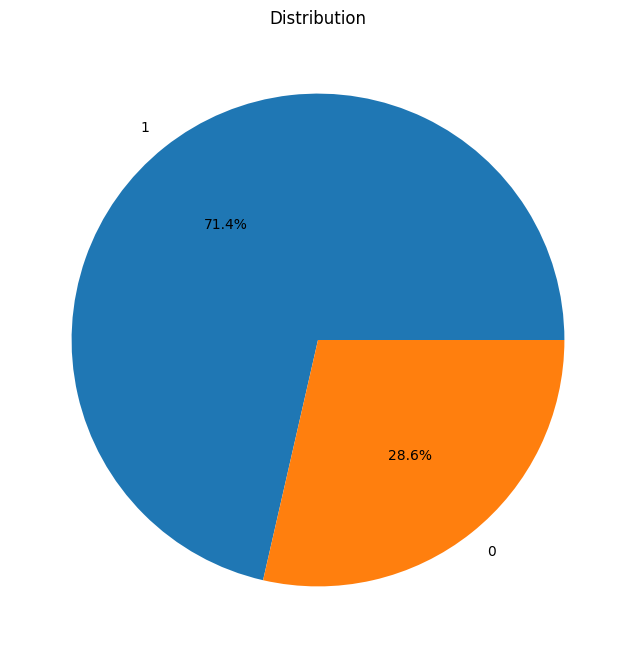

In [ ]:
# Calculating the distribution of categories in the 'Category' column
import matplotlib.pyplot as plt
distribution = df['flag'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.title('Distribution')
plt.show()

# Preproccessing



## *Tokenization*

In [ ]:
!pip install --quiet spacy

In [ ]:
import spacy
import tqdm
from typing import List, Tuple

# Spacy підтримує багато мов. Зараз нам потрібна англійська
spacy_nlp = spacy.blank("en")


def tokenize_spacy(text: str) -> List[str]:
  """Tokenize string with SpaCy """

  tokens = spacy_nlp.tokenizer(text)
  return [str(token) for token in tokens]




In [ ]:
print(tokenize_spacy("Very professional but with a friendly approach from all staff. Couldn't have asked for better treatment. Would be happy to come back but hope I don't have to."))


['Very', 'professional', 'but', 'with', 'a', 'friendly', 'approach', 'from', 'all', 'staff', '.', 'Could', "n't", 'have', 'asked', 'for', 'better', 'treatment', '.', 'Would', 'be', 'happy', 'to', 'come', 'back', 'but', 'hope', 'I', 'do', "n't", 'have', 'to', '.']


## Stemming

In [ ]:
!pip install pystemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystemmer: filename=PyStemmer-2.2.0.1-cp310-cp310-linux_x86_64.whl size=579733 sha256=a9b5b07931932c99ab6453f21bc97f93a0d0d33fb4624c14b04d81309bbd5442
  Stored in directory: /root/.cache/pip/wheels/45/7d/2c/a7ebb8319e01acc5306fa1f8558bf24063d6cec2c02de330c9
Successfully built pystemmer


In [ ]:
import Stemmer
from typing import List

def stem(tokens: List[str]) -> List[str]:
  """Lower-case and stem tokens. """

  stemmer = Stemmer.Stemmer("english")
  tokens = [tok.lower() for tok in tokens]
  return stemmer.stemWords(tokens)





In [ ]:
print(stem(['Very', 'professional', 'but', 'with', 'a', 'friendly', 'approach', 'from', 'all', 'staff', '.', 'Could', "n't", 'have', 'asked', 'for', 'better', 'treatment', '.', 'Would', 'be', 'happy', 'to', 'come', 'back', 'but', 'hope', 'I', 'do', "n't", 'have', 'to', '.']))

['veri', 'profession', 'but', 'with', 'a', 'friend', 'approach', 'from', 'all', 'staff', '.', 'could', "n't", 'have', 'ask', 'for', 'better', 'treatment', '.', 'would', 'be', 'happi', 'to', 'come', 'back', 'but', 'hope', 'i', 'do', "n't", 'have', 'to', '.']


# Забрати стоп слова

In [ ]:
STOP_WORDS = stem(["the", "and", "a", "of", "to", "is", "in", "that", "this", "was", "as", "with", "for", "you", "are", "it"])

def remove_stop_words(tokens: List[str]) -> List[str]:
  return [token for token in tokens if token not in STOP_WORDS]

In [ ]:
def preprocess(text: str) -> List[str]:
  tokens = tokenize_spacy(text)
  tokens = stem(tokens)
  tokens = remove_stop_words(tokens)
  return tokens

# train test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your data is stored in a pandas DataFrame named df
X = df['comment']  # Features
y = df['flag'].astype(int)     # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train_processed = [preprocess(text) for text in X_train]
X_test_processed = [preprocess(text) for text in X_test]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in X_train_processed])
X_test_tfidf = tfidf_vectorizer.transform([' '.join(tokens) for tokens in X_test_processed])

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train a logistic regression model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = decision_tree_model.predict(X_test_tfidf)


# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Обчислення матриці конфузії
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Обчислення точності
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Обчислення точності (precision)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Обчислення чутливості (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Обчислення F1-показника
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[223 114]
 [ 90 767]]
Accuracy: 0.8291457286432161
Precision: 0.8706015891032917
Recall: 0.8949824970828472
F1 Score: 0.8826237054085155


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
best_hyperparameters = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
best_decision_tree_model = DecisionTreeClassifier(**best_hyperparameters)

# Навчання моделі на найкращих гіперпараметрах
best_decision_tree_model.fit(X_train_tfidf, y_train)

# Прогнозування на тестовому наборі
y_pred = best_decision_tree_model.predict(X_test_tfidf)


              precision    recall  f1-score   support

           0       0.71      0.72      0.71       337
           1       0.89      0.88      0.89       857

    accuracy                           0.84      1194
   macro avg       0.80      0.80      0.80      1194
weighted avg       0.84      0.84      0.84      1194

Confusion Matrix:
[[242  95]
 [100 757]]
Accuracy: 0.8366834170854272
Precision: 0.8884976525821596
Recall: 0.8833138856476079
F1 Score: 0.8858981860737273


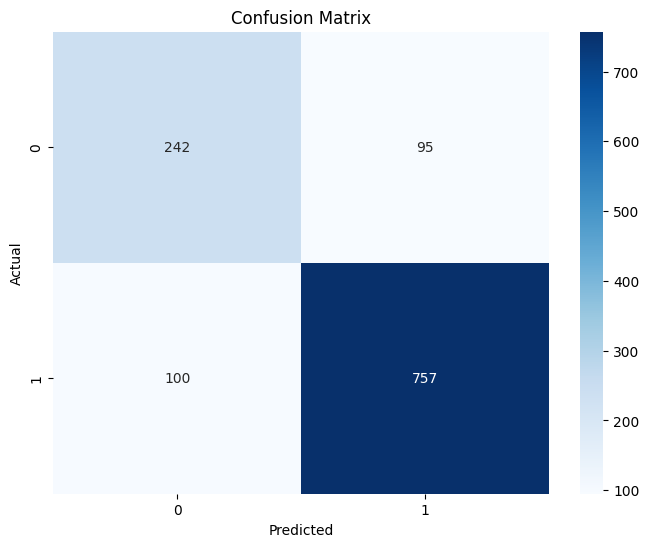

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Обчислення матриці конфузії
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Обчислення точності
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Обчислення точності (precision)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Обчислення чутливості (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Обчислення F1-показника
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(decision_tree_model.criterion)

gini


In [ ]:
print(y_pred)

[1 1 1 ... 1 1 1]


# Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       337
           1       0.93      0.96      0.95       857

    accuracy                           0.92      1194
   macro avg       0.91      0.89      0.90      1194
weighted avg       0.92      0.92      0.92      1194

Confusion Matrix:
[[279  58]
 [ 37 820]]
Accuracy: 0.9204355108877722
Precision: 0.9339407744874715
Recall: 0.9568261376896149
F1 Score: 0.9452449567723341


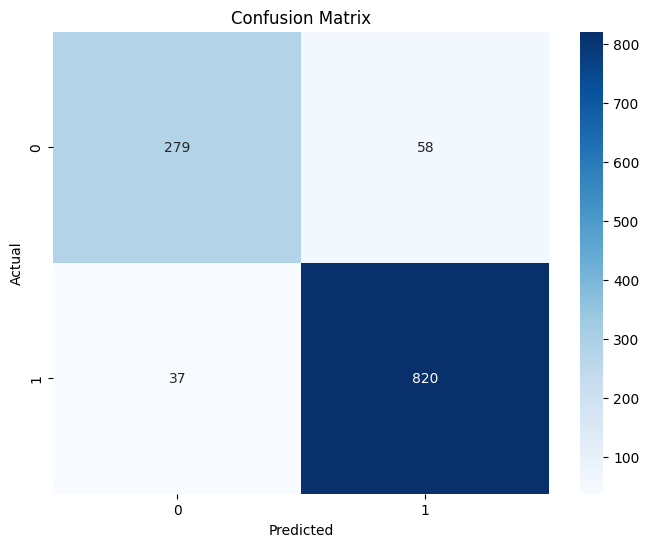

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train a logistic regression model
l_model = LogisticRegression()
l_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = l_model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Обчислення точності
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Обчислення точності (precision)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Обчислення чутливості (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Обчислення F1-показника
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(X_train_tfidf[0])

  (0, 5362)	0.3401333984415042
  (0, 224)	0.5244534173661309
  (0, 4187)	0.491565925671617
  (0, 5843)	0.16177875791928545
  (0, 1193)	0.22163271702300077
  (0, 4051)	0.16467484378643885
  (0, 6237)	0.36514086141910873
  (0, 765)	0.36315526207580257


In [ ]:
print(X_train_processed[0])

['answer', 'phone', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '\n', 'i', 'have', 'been', 'on', 'hold', '40', 'minut']


# Bert optimized

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
import pandas as pd
import numpy as np
import os
import random

import tensorflow as tf

import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim import lr_scheduler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
#  from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

from tqdm.auto import tqdm

import gc

In [ ]:
from transformers import AutoModel, BertTokenizerFast, AutoModelForSequenceClassification
MAX_LENGTH = 128
TRAINING_BATCH_SIZE = 32
VALIDATION_BATCH_SIZE = 32
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
texts = list(df['comment'])
labels = list(df['flag'])

train_texts, val_texts, train_labels, val_labels = train_test_split(texts,
                                                                    labels,
                                                                    stratify=labels,
                                                                    test_size=0.2,
                                                                    random_state=42)

# Tokenize train and validation texts
train_encodings = tokenizer(train_texts, truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors='pt')
val_encodings = tokenizer(val_texts, truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors='pt')

# Convert labels to tensors
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
val_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels_tensor)
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], val_labels_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=TRAINING_BATCH_SIZE, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=VALIDATION_BATCH_SIZE, shuffle=False)
num_epochs = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

Epoch 1:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 1/10:
Training Loss: 0.0043


Epoch 2:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 2/10:
Training Loss: 0.0027


Epoch 3:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 3/10:
Training Loss: 0.0017


Epoch 4:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 4/10:
Training Loss: 0.0011


Epoch 5:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 5/10:
Training Loss: 0.0008


Epoch 6:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 6/10:
Training Loss: 0.0006


Epoch 7:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 7/10:
Training Loss: 0.0009


Epoch 8:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 8/10:
Training Loss: 0.0005


Epoch 9:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 9/10:
Training Loss: 0.0003


Epoch 10:   0%|          | 0/150 [00:00<?, ?it/s]

Epoch 10/10:
Training Loss: 0.0003


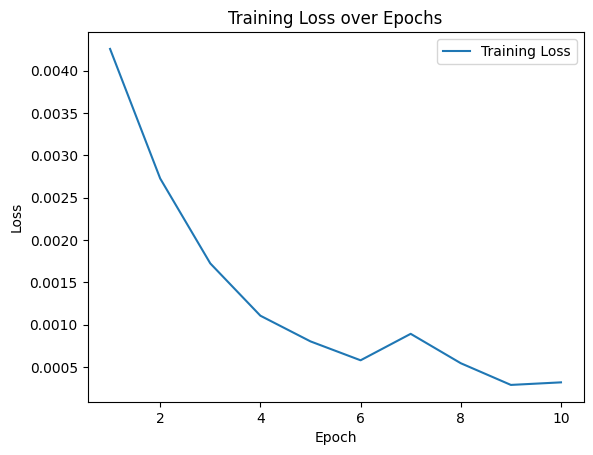

In [ ]:
from torch.optim import lr_scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, no_deprecation_warning=True)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
train_loss_list = []

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

num_epochs = 10
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for input_ids, attention_mask, labels in tqdm(DataLoader(train_dataset, batch_size=TRAINING_BATCH_SIZE, shuffle=True), desc=f'Epoch {epoch + 1}', leave=False):
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    avg_train_loss = train_loss / len(train_dataset)
    train_loss_list.append(avg_train_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}:")
    print(f"Training Loss: {train_loss / len(train_dataset):.4f}")

plt.plot(np.arange(1, num_epochs + 1), train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Training Loss: 0.0003
Validation Loss: 0.0084
Validation Recall: 0.9428
Validation Precision: 0.9353
Validation Accuracy: 0.9497
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       341
           1       0.97      0.96      0.96       853

    accuracy                           0.95      1194
   macro avg       0.94      0.94      0.94      1194
weighted avg       0.95      0.95      0.95      1194

Confusion Matrix:
[[316  25]
 [ 35 818]]
F1 Score: 0.9646226415094339


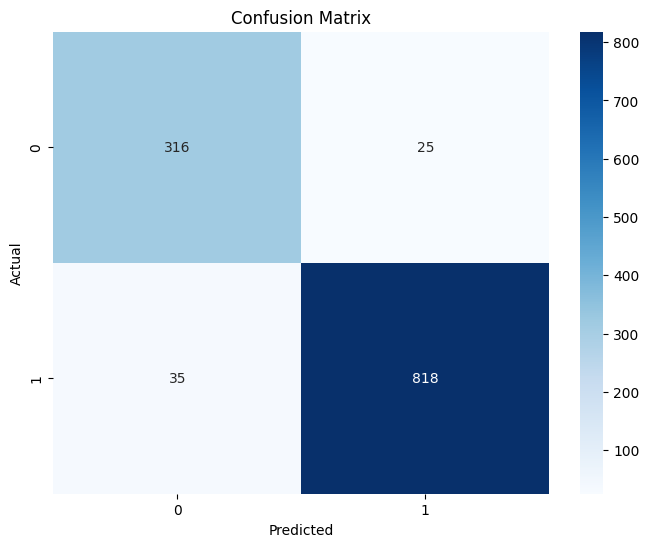

In [ ]:
model.eval()
total_val_loss = 0.0
all_val_labels = []
all_val_probs = []
all_val_preds = []

with torch.no_grad():
    for input_ids, attention_mask, labels in tqdm(DataLoader(val_dataset, batch_size=TRAINING_BATCH_SIZE), desc=f'Validation', leave=False):
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        total_val_loss += criterion(logits, labels).item()

        probs = torch.nn.functional.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)

        all_val_preds.extend(preds.cpu().numpy())
        all_val_labels.extend(labels.cpu().numpy())
        all_val_probs.extend(probs.cpu().numpy()[:, 1])

average_val_loss = total_val_loss / len(val_dataset)
val_recall = recall_score(all_val_labels, all_val_preds, average='macro')
val_precision = precision_score(all_val_labels, all_val_preds, average='macro')

val_accuracy = accuracy_score(all_val_labels, all_val_preds)
print(f"Training Loss: {train_loss / len(train_dataset):.4f}")
print(f"Validation Loss: {average_val_loss:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"{classification_report(all_val_labels, all_val_preds)}")
conf_matrix = confusion_matrix(all_val_labels, all_val_preds)
print("Confusion Matrix:")
print(conf_matrix)
# Обчислення F1-показника
f1 = f1_score(all_val_labels, all_val_preds)
print("F1 Score:", f1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from transformers import TFBertModel

# Assuming `model` is your trained BERT model
model_path = "bert_model"
model.save_pretrained(f"/content/gdrive/MyDrive/dyploma/{model_path}")

In [ ]:
import torch

# Assuming 'model' is your BERT model
model_path = 'bert_model_torch.pth'
torch.save(model, f"/content/gdrive/MyDrive/dyploma/{model_path}")

In [ ]:
f1_scores = [0.92, 0.93]
average_f1 = sum(f1_scores) / len(f1_scores)

print("Average F1 score:", average_f1)


Average F1 score: 0.925


# Ensemble

In [ ]:
from collections import Counter
class Ensemble:
    def __init__(self, models):
        self.models = models

    def predict(self, X):
        predictions = []
        for model in self.models:
            if 'bert' in str(type(model)).lower():
                # Preprocess the input data for BERT
                model_name = "bert-base-uncased"
                tokenizer = AutoTokenizer.from_pretrained(model_name)
                X_encoded = tokenizer(X.tolist(),
                                      truncation=True,
                                      padding='max_length',
                                      max_length=MAX_LENGTH,
                                      return_tensors='pt')
                input_ids = X_encoded['input_ids'].to(device)
                attention_mask = X_encoded['attention_mask'].to(device)

                # Pass the input through the model
                with torch.no_grad():
                    outputs = model(input_ids, attention_mask=attention_mask)
                    print(outputs.keys())
                logits = outputs.logits

                # Apply softmax to get probabilities
                probs = torch.nn.functional.softmax(logits, dim=1)

                # Convert probabilities to predicted class labels
                preds = torch.argmax(probs, dim=1)

                # Append predicted labels to the list
                predictions.append(preds.cpu().numpy())

            else:
                # For non-BERT models, make predictions directly
                X_test_processed = [preprocess(text) for text in X_test]
                X_test_tfidf = tfidf_vectorizer.transform([' '.join(tokens) for tokens in X_test_processed])
                model_predictions = model.predict(X_test_tfidf)
                not_binary_count = sum(1 for p in model_predictions if p not in [0, 1])
                print("Number of predictions not 0 or 1:", not_binary_count)
                predictions.append(model_predictions)

        ensemble_predictions = []
        for preds in zip(*predictions):
            # For each example, count the votes for each class label
            votes = Counter(preds)
            # Take the class label with the most votes
            majority_vote = votes.most_common(1)[0][0]
            ensemble_predictions.append(majority_vote)

        return ensemble_predictions


In [ ]:
print(X_test)

13163    Thank you to all the staff who were very polit...
1730     Yet again, not that I enjoy going in hospital ...
5491     I was treated very well on Maple Ward and I ha...
6592     The reception staff directed us to the wrong w...
10725    brought in as emergency to A+E(my partner) and...
                               ...                        
1956     Nurses were caring and attentive. Staff nurse ...
6712     ALMOST EVERYTHING. Staff forgot patients are w...
4047     I was admitted for a heart condition. All of t...
4225     I telephoned, eventually being able to gain ac...
8753     I was a patient on 5 East B ward last week whi...
Name: comment, Length: 1194, dtype: object


In [ ]:
# Assuming your data is stored in a pandas DataFrame named df
X = df['comment']  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Assuming your ensemble model expects the 'comment' column for prediction
models = [model, decision_tree_model, l_model]
ensemble = Ensemble(models)

# Make predictions using the ensemble model
pred = ensemble.predict(X_test)


odict_keys(['logits'])
Number of predictions not 0 or 1: 0
Number of predictions not 0 or 1: 0


In [ ]:
print(len(pred))

1194


In [ ]:
# Assuming you have imported necessary libraries and defined your ensemble model

# Assuming your data is stored in a pandas DataFrame named df
X = df['comment']  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the test set
pred = ensemble.predict(X_test)

predicted_sentiment_labels = ['positive' if p == 1 else 'negative' for p in pred]

# Create a new DataFrame to store the predictions along with the original 'Org Name' data
predictions_df = pd.DataFrame({'comment': X_test, 'Org Name': df.loc[X_test.index, 'Org Name'], 'predicted_sentiment': predicted_sentiment_labels})

# Now 'predictions_df' contains the original 'Org Name' data along with the predicted sentiment labels
predictions_df

,comment,Org Name,predicted_sentiment
13163,Thank you to all the staff who were very polit...,Wharfedale Hospital,positive
1730,"Yet again, not that I enjoy going in hospital ...",Chorley and South Ribble Hospital,positive
5491,I was treated very well on Maple Ward and I ha...,Meadowfield,positive
6592,The reception staff directed us to the wrong w...,Okehampton Community Hospital,negative
10725,brought in as emergency to A+E(my partner) and...,St Mary's Hospital (HQ),negative
...,...,...,...
1956,Nurses were caring and attentive. Staff nurse ...,Colchester General Hospital,positive
6712,ALMOST EVERYTHING. Staff forgot patients are w...,Peterborough District Hospital,negative
4047,I was admitted for a heart condition. All of t...,John Radcliffe Hospital,positive
4225,"I telephoned, eventually being able to gain ac...",King Edward Vii Hospital,negative


In [ ]:


# Load Logistic Regression model
joblib.dump(l_model, '/content/gdrive/MyDrive/dyploma/logistic_regression_model.pkl')

# Save Decision Tree model
joblib.dump(decision_tree_model, '/content/gdrive/MyDrive/dyploma/decision_tree_model.pkl')

In [ ]:
from transformers import AutoTokenizer
from transformers import BertModel
import torch
import joblib
MAX_LENGTH = 128
TRAINING_BATCH_SIZE = 32
VALIDATION_BATCH_SIZE = 32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Load BERT model (assuming it's saved using the transformers library)
bert_model = torch.load("/content/gdrive/MyDrive/dyploma/bert_model_torch.pth")
# Load Logistic Regression model
logistic_model = joblib.load('/content/gdrive/MyDrive/dyploma/logistic_regression_model.pkl')

# Load Decision Tree model
decision_tree_model = joblib.load('/content/gdrive/MyDrive/dyploma/decision_tree_model.pkl')
models = [bert_model, decision_tree_model, logistic_model]
ensemble = Ensemble(models)

# Make predictions using the ensemble model
# Assuming your data is stored in a pandas DataFrame named df
X = df['comment']  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the test set
pred = ensemble.predict(X_test)

# predicted_sentiment_labels = ['positive' if p == 1 else 'negative' for p in pred]

# # Create a new DataFrame to store the predictions along with the original 'Org Name' data
# predictions_df = pd.DataFrame({'comment': X_test, 'Org Name': df.loc[X_test.index, 'Org Name'], 'predicted_sentiment': predicted_sentiment_labels})

# # Now 'predictions_df' contains the original 'Org Name' data along with the predicted sentiment labels
# predictions_df


odict_keys(['logits'])
Number of predictions not 0 or 1: 0
Number of predictions not 0 or 1: 0


              precision    recall  f1-score   support

           0       0.93      0.90      0.92       337
           1       0.96      0.97      0.97       857

    accuracy                           0.95      1194
   macro avg       0.95      0.94      0.94      1194
weighted avg       0.95      0.95      0.95      1194

Confusion Matrix:
[[304  33]
 [ 23 834]]
Accuracy: 0.9530988274706867
Precision: 0.9619377162629758
Recall: 0.9731621936989499
F1 Score: 0.9675174013921114


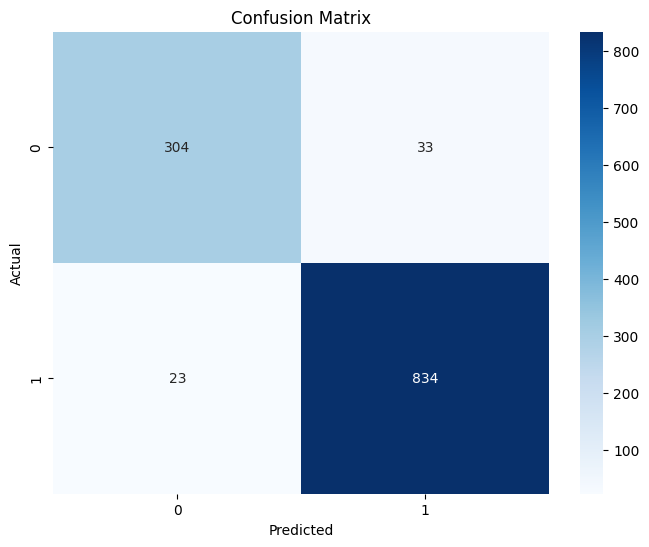

In [ ]:
# Evaluate the model
import seaborn as sns
import matplotlib.pyplot as plt
print(classification_report(y_test, pred))
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(conf_matrix)

# Обчислення точності
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

# Обчислення точності (precision)
precision = precision_score(y_test, pred)
print("Precision:", precision)

# Обчислення чутливості (recall)
recall = recall_score(y_test, pred)
print("Recall:", recall)

# Обчислення F1-показника
f1 = f1_score(y_test, pred)
print("F1 Score:", f1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predictions_df.to_csv('result.csv')

In [ ]:
import pandas as pd

text = 'Doctor was very nice'
series = pd.Series(text)
pred = ensemble.predict(series)
print(pred)

Number of predictions not 0 or 1: 0
Number of predictions not 0 or 1: 0
[1]


In [ ]:
import pandas as pd
text = 'Doctor was very nice'
series = pd.Series(text)
pred = ensemble.predict(series)
print(pred)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, pred)

f1 = f1_score(y_test, pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print("accuracy:", accuracy)
print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion_mat)
print(classification_report(y_test, pred))

accuracy: 0.9530988274706867
F1 score: 0.9675174013921114
Precision: 0.9339407744874715
Recall: 0.9568261376896149
Confusion Matrix:
[[279  58]
 [ 37 820]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       337
           1       0.96      0.97      0.97       857

    accuracy                           0.95      1194
   macro avg       0.95      0.94      0.94      1194
weighted avg       0.95      0.95      0.95      1194



# NEW DATASET

In [ ]:
import pandas as pd
import json
with open('/content/data_2024-05-09_17-44-50.json') as f:
    data = json.load(f)
json_data= data['comments']
comments = [entry['comment'] for entry in json_data]

# Create DataFrame from comments
df = pd.DataFrame(comments)

df = df[['odsCode', 'commentText', 'visit', 'department']]
# Assuming your DataFrame is named df



In [ ]:
# Define a function to extract values from the dictionary
def extract_values(row):
    return row['month'], row['year']

# Apply the function to the column containing the dictionary
df[['month', 'year']] = df['visit'].apply(lambda x: pd.Series(extract_values(x)))
df.drop(columns=['visit'], inplace=True)
# Now your DataFrame should have separate columns for 'month' and 'year'
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['month'] = df['month'].map(month_map)
df

,odsCode,commentText,department,month,year
0,RA901,I had an appointment at the Endoscopy Unit on ...,Don't know,April,2024
1,RNN62,Was admitted to Hazel ward quite a few times d...,Gastrointestinal and Liver services,December,2023
2,RC971,I was frightened anxious panicked when I had ...,Stroke,March,2024
3,RBD01,My wife took my 13 year old daughter to Dorche...,Accident and emergency services,March,2024
4,RK950,Went in to have my machine repaired only to be...,Sleep Medicine,April,2024
...,...,...,...,...,...
95,RJ611,I had an appointment with the Rheumatology Dep...,Rheumatology,July,2022
96,RATPH,Visited Orsett Minor Injuries Unit today. Fol...,Urgent care centre,June,2022
97,RPA02,I am trying to contact the Radiology departmen...,Don't know,June,2022
98,RAN01,We were absolutely amazed at the service we re...,Orthopaedics,May,2022


In [ ]:
print(df.head(5))

  odsCode                                        commentText  \
0   RA901  I had an appointment at the Endoscopy Unit on ...   
1   RNN62  Was admitted to Hazel ward quite a few times d...   
2   RC971  I was frightened anxious panicked  when I had ...   
3   RBD01  My wife took my 13 year old daughter to Dorche...   
4   RK950  Went in to have my machine repaired only to be...   

                            department     month  year  
0                           Don't know     April  2024  
1  Gastrointestinal and Liver services  December  2023  
2                               Stroke     March  2024  
3      Accident and emergency services     March  2024  
4                       Sleep Medicine     April  2024  


In [ ]:

from transformers import BertModel
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Load BERT model (assuming it's saved using the transformers library)
bert_model = torch.load(model_path)
# Load Logistic Regression model
logistic_model = joblib.load('/content/gdrive/MyDrive/dyploma/logistic_regression_model.pkl')

# Load Decision Tree model
decision_tree_model = joblib.load('/content/gdrive/MyDrive/dyploma/decision_tree_model.pkl')

models = [bert_model, decision_tree_model, logistic_model]
ensemble = Ensemble(models)

# Make predictions using the ensemble model
# Assuming your data is stored in a pandas DataFrame named df
X = df['commentText']  # Features

# Make predictions on the test set
pred = ensemble.predict(X)

predicted_sentiment_labels = ['positive' if p == 1 else 'negative' for p in pred]

# Create a new DataFrame to store the predictions along with the original 'Org Name' data
predictions_df = pd.DataFrame({'comment': X, 'Org Name': df.loc[X.index, 'odsCode'], 'Department': df.loc[X.index, 'department'],
                                'month': df.loc[X.index, 'month'],	'year': df.loc[X.index, 'year'],
                               'predicted_sentiment': predicted_sentiment_labels})

# Now 'predictions_df' contains the original 'Org Name' data along with the predicted sentiment labels
predictions_df


odict_keys(['logits'])
Number of predictions not 0 or 1: 0
Number of predictions not 0 or 1: 0


,comment,Org Name,Department,month,year,predicted_sentiment
0,I had an appointment at the Endoscopy Unit on ...,RA901,Don't know,April,2024,positive
1,Was admitted to Hazel ward quite a few times d...,RNN62,Gastrointestinal and Liver services,December,2023,positive
2,I was frightened anxious panicked when I had ...,RC971,Stroke,March,2024,positive
3,My wife took my 13 year old daughter to Dorche...,RBD01,Accident and emergency services,March,2024,positive
4,Went in to have my machine repaired only to be...,RK950,Sleep Medicine,April,2024,negative
...,...,...,...,...,...,...
95,I had an appointment with the Rheumatology Dep...,RJ611,Rheumatology,July,2022,negative
96,Visited Orsett Minor Injuries Unit today. Fol...,RATPH,Urgent care centre,June,2022,positive
97,I am trying to contact the Radiology departmen...,RPA02,Don't know,June,2022,positive
98,We were absolutely amazed at the service we re...,RAN01,Orthopaedics,May,2022,positive


In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load BERT model (assuming it's saved using the transformers library)
bert_model = BertModel.from_pretrained('/content/bert_model')

# Load Logistic Regression model
logistic_model = joblib.load('/content/gdrive/MyDrive/dyploma/logistic_regression_model.pkl')

# Load Decision Tree model
decision_tree_model = joblib.load('/content/gdrive/MyDrive/dyploma/decision_tree_model.pkl')

# Create ensemble with models
models = [bert_model, decision_tree_model, logistic_model]
ensemble = Ensemble(models)

# Now 'ensemble' and all loaded models are on the same device

# Make predictions using the ensemble model
# Assuming your data is stored in a pandas DataFrame named df
X = df['commentText']  # Features

# Make predictions on the test set
pred = ensemble.predict(X)

predicted_sentiment_labels = ['positive' if p == 1 else 'negative' for p in pred]

# Create a new DataFrame to store the predictions along with the original 'Org Name' data
predictions_df = pd.DataFrame({'comment': X, 'Org Name': df.loc[X.index, 'odsCode'], 'Department': df.loc[X.index, 'department'],
                                'month': df.loc[X.index, 'month'],	'year': df.loc[X.index, 'year'],
                               'predicted_sentiment': predicted_sentiment_labels})

# Now 'predictions_df' contains the original 'Org Name' data along with the predicted sentiment labels
predictions_df


OSError: Incorrect path_or_model_id: '/content/bert_model'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
predictions_df.reset_index(drop=True, inplace=True)

# Now 'predictions_df' has its index dropped
predictions_df

,comment,Org Name,Department,month,year,predicted_sentiment
0,I had an appointment at the Endoscopy Unit on ...,RA901,Don't know,April,2024,positive
1,Was admitted to Hazel ward quite a few times d...,RNN62,Gastrointestinal and Liver services,December,2023,positive
2,I was frightened anxious panicked when I had ...,RC971,Stroke,March,2024,positive
3,My wife took my 13 year old daughter to Dorche...,RBD01,Accident and emergency services,March,2024,positive
4,Went in to have my machine repaired only to be...,RK950,Sleep Medicine,April,2024,negative
...,...,...,...,...,...,...
95,I had an appointment with the Rheumatology Dep...,RJ611,Rheumatology,July,2022,negative
96,Visited Orsett Minor Injuries Unit today. Fol...,RATPH,Urgent care centre,June,2022,positive
97,I am trying to contact the Radiology departmen...,RPA02,Don't know,June,2022,positive
98,We were absolutely amazed at the service we re...,RAN01,Orthopaedics,May,2022,positive


In [ ]:
print(predictions_df.columns)

Index(['comment', 'Org Name', 'Department', 'month', 'year',
       'predicted_sentiment'],
      dtype='object')


In [ ]:
predictions_df.to_csv('result_new.csv')